<h2> Project Goal & Overview</h2>

In collaboration with a publishing company, our project explores how reader-generated data from platforms like Google Books and Hardcover can be used to uncover meaningful patterns in book genre popularity. With a growing volume of public reviews and ratings available online, publishers now have the opportunity to complement internal sales data with broader, real-time insights from readers themselves.

The primary goal of this analysis is to identify which book genres are currently resonating most with readers and to understand the underlying themes and sentiment that drive engagement. By examining both structured data (e.g., ratings, genres) and unstructured review text, we aim to highlight emerging trends, cross-platform differences, and the specific language readers use when discussing the books they love.

These insights can support publishing houses in making more informed editorial decisions—helping them optimize their catalog offerings, spot rising genres early, and tailor marketing strategies to better connect with their audience.


<h3>Members </h3>

- Anushka Jain - ajain10@umd.edu
- Loveleen Kaur - lkaur@umd.edu
- Manasvi Surasani - maivy@umd.edu
- Megha Jahnavi Mudigonda - jahnavim@umd.edu
- Palak Kishore - kish0507@umd.edu



<h2>Data Acquisition</h2>
This section outlines the step-by-step data acquisition process used to collect book metadata and user reviews from the Hardcover platform. Since the data is not available as a downloadable file or through an official API, we utilized web scraping methods to collect, parse, and filter the information.

<h3>Part 1: Data Acquisition from Hardcover</h3>

- Step 1: Acquire Book details from Hardcover
- Step 2: Acquire Book Reviews from Hardcover



<h4>Step 1: Acquire Book details from Hardcover</h4>

- Step 1.1.1: Retrieve Metadata for a Single Book
- Step 1.1.2: Retrieve Metadata for Top 25 Trending Books
- Step 1.1.3: Retrieve Metadata for 300 Books (2014–2024)

<h4>Step 1.1.1: Retrieve Metadata for a Single Book</h4>

To begin understanding the structure of Hardcover’s data, we selected a well-known book (Harry Potter and the Sorcerer’s Stone) and scraped its detail (Book Info) page. We extracted details like the book’s title, author, average rating, number of ratings, release year, description, and genres.

In [ ]:
#Importing all the essential libraries
import requests
from bs4 import BeautifulSoup
import html
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import time

In [ ]:
url = "https://hardcover.app/books/harry-potter-and-the-sorcerers-stone"
response = requests.get(url).text
response

'<!DOCTYPE html>\n<html lang="en" class="h-full antialiased dark">\n  <head>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover">\n    <title inertia>Harry Potter and the Sorcerer&#39;s Stone</title>\n    <meta name="description" content="Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.\n\nAll he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry&#39;s room is a tiny closet at the foot of the stairs, and he hasn&#39;t had a birthday party in eleven years.\n\nBut all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.\n\nFor it&#39;s there t

In [ ]:
soup = BeautifulSoup(response, "html.parser")
soup

<!DOCTYPE html>

<html class="h-full antialiased dark" lang="en">
<head>
<meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/>
<title inertia="">Harry Potter and the Sorcerer's Stone</title>
<meta content="Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.

All he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry's room is a tiny closet at the foot of the stairs, and he hasn't had a birthday party in eleven years.

But all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.

For it's there that he finds not only friends, aerial sports, and magic 

In [ ]:
data_page_raw = soup.find("div", id="app")["data-page"]
data_page_raw

'{"component":"clientverse/books/show","props":{"generatedAt":1746745393,"pathName":"/books/harry-potter-and-the-sorcerers-stone","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.\\n\\nAll he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry\'s room is a tiny closet at the foot of the stairs, and he hasn\'t had a birthday party in eleven years.\\n\\nBut all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.\\n\\nFor it\'s there that he finds not only frien

In [ ]:
data_json = html.unescape(data_page_raw)
data_json

'{"component":"clientverse/books/show","props":{"generatedAt":1746745393,"pathName":"/books/harry-potter-and-the-sorcerers-stone","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.\\n\\nAll he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry\'s room is a tiny closet at the foot of the stairs, and he hasn\'t had a birthday party in eleven years.\\n\\nBut all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.\\n\\nFor it\'s there that he finds not only frien

In [ ]:
# Title
title = soup.title.string.strip() if soup.title else None
title

"Harry Potter and the Sorcerer's Stone"

In [ ]:
# description
description_tag = soup.find("meta", attrs={"name": "description"})
description = description_tag["content"].strip() if description_tag else None
description

"Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.\n\nAll he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry's room is a tiny closet at the foot of the stairs, and he hasn't had a birthday party in eleven years.\n\nBut all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.\n\nFor it's there that he finds not only friends, aerial sports, and magic in everything from classes to meals, but a great destiny that's been waiting for him... if Harry can survive the encounter."

In [ ]:
# Average Rating and Rating Count
average_rating = None
rating_count = None
for span in soup.find_all("span"):
    if span.text.strip().lower() == "average rating":
        next_span = span.find_next("span")
        average_rating = next_span.text.strip()
    if span.text.strip().lower() == "ratings":
        next_span = span.find_next("span")
        rating_count = next_span.text.strip()

print(rating_count)
average_rating

4,405


'4.3'

In [ ]:
# Release Date (look for 4-digit year)
release_year = None
if "first released in" in soup.text.lower():
    import re
    match = re.search(r"first released in.*?(\d{4})", soup.text, re.IGNORECASE)
    if match:
        release_year = match.group(1)

release_year

'1936'

In [ ]:
data = json.loads(data_json)
book = data["props"]["book"]
author = book.get("contributions", [{}])[0].get("author", {}).get("name")

author

'J. K. Rowling'

In [ ]:
# Genres
genre_spans = soup.select("span.capitalize")
genres = [g.text.strip() for g in genre_spans if g.text.strip()]

genres

['Fantasy',
 'Fiction',
 'Young Adult',
 'Adventure',
 'Classics',
 'Adventurous',
 'lighthearted',
 'mysterious',
 'funny',
 'sad',
 'Medical content',
 'animal death',
 'Violence']

In [ ]:
url = "https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/editions"
response = requests.get(url).text
response

'<!DOCTYPE html>\n<html lang="en" class="h-full antialiased dark">\n  <head>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover">\n    <title inertia></title>\n    <meta name="description" content="We&#39;re a social network for book lovers to find life changing books, track what you read &amp; want to read, and connect with passionate readers." inertia>\n    <link rel="stylesheet" href="https://static.hardcover.app/vite/assets/fonts-DzqwSaWy.css" media="screen" />\n    <link rel="preconnect" href="https://search.hardcover.app" />\n\n        <link rel="preload" href="https://img.hardcover.app/crop?url=https://assets.hardcover.app/static/pages/home/heroImage.png&width=702&height=424&type=webp" as="image" />\n      <meta property="og:title" content="Hardcover" inertia="og:title">\n      <meta property="og:description" content="We&#39;re a social network for book lovers to find life changing books, track what you read &amp; want to read, and conn

In [ ]:
soup = BeautifulSoup(response, "html.parser")
soup

<!DOCTYPE html>

<html class="h-full antialiased dark" lang="en">
<head>
<meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/>
<title inertia=""></title>
<meta content="We're a social network for book lovers to find life changing books, track what you read &amp; want to read, and connect with passionate readers." inertia="" name="description"/>
<link href="https://static.hardcover.app/vite/assets/fonts-DzqwSaWy.css" media="screen" rel="stylesheet"/>
<link href="https://search.hardcover.app" rel="preconnect"/>
<link as="image" href="https://img.hardcover.app/crop?url=https://assets.hardcover.app/static/pages/home/heroImage.png&amp;width=702&amp;height=424&amp;type=webp" rel="preload"/>
<meta content="Hardcover" inertia="og:title" property="og:title"/>
<meta content="We're a social network for book lovers to find life changing books, track what you read &amp; want to read, and connect with passionate readers." inertia="og:description" property="og:de

In [ ]:
data_page_raw = soup.find("div", id="app")["data-page"]
data_page_raw

'{"component":"clientverse/books/editions/index","props":{"generatedAt":1746745394,"pathName":"/books/harry-potter-and-the-sorcerers-stone/editions","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"View all editions of Harry Potter and the Sorcerer\'s Stone on Hardcover","icons":{"icon":"https://assets.hardcover.app/static/favicon.ico","apple":"https://assets.hardcover.app/static/logos/hardcover-logo.jpeg"},"alternates":{"types":{"application/rss+xml":"https://hardcover.app/rss"}},"openGraph":{"type":"website","url":"https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/editions","title":"Editions of Harry Potter and the Sorcerer\'s Stone - Hardcover","description":"View all editions of Harry Potter and the Sorcerer\'s Stone on Hardcover","siteName":"Hardcover","images":[{"url":"https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/ogimage.png","width":1270,"height":762,"alt":"Harry Pot

In [ ]:
data_json = html.unescape(data_page_raw)
data_json

'{"component":"clientverse/books/editions/index","props":{"generatedAt":1746745394,"pathName":"/books/harry-potter-and-the-sorcerers-stone/editions","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"View all editions of Harry Potter and the Sorcerer\'s Stone on Hardcover","icons":{"icon":"https://assets.hardcover.app/static/favicon.ico","apple":"https://assets.hardcover.app/static/logos/hardcover-logo.jpeg"},"alternates":{"types":{"application/rss+xml":"https://hardcover.app/rss"}},"openGraph":{"type":"website","url":"https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/editions","title":"Editions of Harry Potter and the Sorcerer\'s Stone - Hardcover","description":"View all editions of Harry Potter and the Sorcerer\'s Stone on Hardcover","siteName":"Hardcover","images":[{"url":"https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/ogimage.png","width":1270,"height":762,"alt":"Harry Pot

In [ ]:
data = json.loads(html.unescape(data_json))
data

{'component': 'clientverse/books/editions/index',
 'props': {'generatedAt': 1746745394,
  'pathName': '/books/harry-potter-and-the-sorcerers-stone/editions',
  'metadata': {'titleDefault': 'Hardcover - Social discovery for serious book lovers',
   'titleTemplate': ' | Hardcover',
   'description': "View all editions of Harry Potter and the Sorcerer's Stone on Hardcover",
   'icons': {'icon': 'https://assets.hardcover.app/static/favicon.ico',
    'apple': 'https://assets.hardcover.app/static/logos/hardcover-logo.jpeg'},
   'alternates': {'types': {'application/rss+xml': 'https://hardcover.app/rss'}},
   'openGraph': {'type': 'website',
    'url': 'https://hardcover.app/books/harry-potter-and-the-sorcerers-stone/editions',
    'title': "Editions of Harry Potter and the Sorcerer's Stone - Hardcover",
    'description': "View all editions of Harry Potter and the Sorcerer's Stone on Hardcover",
    'siteName': 'Hardcover',
    'images': [{'url': 'https://hardcover.app/books/harry-potter-and

In [ ]:
editions = data.get("props", {}).get("editions", [])
editions

[{'id': 2667580,
  'bookId': 328491,
  'editionFormat': 'Hardcover',
  'editionInformation': 'Library Edition',
  'image': {'id': 3024021,
   'url': 'https://assets.hardcover.app/external_data/61129612/ec8e6be2922e91f343f8d159557ae3134e9363d1.jpeg',
   'height': 500,
   'width': 333,
   'color': '#758583'},
  'contributions': [{'author': {'id': None,
     'name': 'J. K. Rowling',
     'slug': 'j-k-rowling',
     'image': {'id': 31962,
      'url': 'https://assets.hardcover.app/authors/80626/5543033-L.jpg',
      'height': 461,
      'width': 468,
      'color': '#eed8ce'}},
    'contribution': None}],
  'releaseDate': None,
  'readingFormatId': 1,
  'language': {'id': 47, 'language': 'French', 'code': 'fr'},
  'readingFormat': {'format': 'Read'},
  'country': {'name': 'Algeria'},
  'publisher': {'id': 5019,
   'name': 'Gallimard jeunesse',
   'slug': 'gallimard-jeunesse-2e5df743-e95d-470e-b614-91aac18ed04e',
   'editionsCount': 71,
   'canonicalId': None,
   'locked': False,
   'parent

In [ ]:
def extract_isbns(editions):
    isbn_10_set = set()
    isbn_13_set = set()

    for edition in editions:
        # First, look under the edition root
        isbn10 = edition.get("isbn10")
        isbn13 = edition.get("isbn13")
        if isbn10:
            isbn_10_set.add(isbn10)
        if isbn13:
            isbn_13_set.add(isbn13)

        # Then check the nested identifiers block if it exists
        identifiers = edition.get("dtoCombined", {}).get("identifiers", {})
        isbn10_list = identifiers.get("isbn_10", [])
        isbn13_list = identifiers.get("isbn_13", [])
        isbn_10_set.update(isbn10_list)
        isbn_13_set.update(isbn13_list)

    return list(isbn_10_set), list(isbn_13_set)

isbn10s, isbn13s = extract_isbns(editions)
print("ISBN-10:", isbn10s)
print("ISBN-13:", isbn13s)

ISBN-10: ['0545582881', '1781101035', '133829914X', '054506967X', '1408855895', '3551354014', '8532511015', '043936213X', '1408855658', '2070518426', '9076174083', '8478886540', '1781100217', '1408845644', '0439708184', '0747549559', '2075105022', '1781102368', '1781100004', '0747532699', '3551551677', '0590353403', '1781100276']
ISBN-13: ['9781781100271', '9789076174082', '9780613206334', '9780545069670', '9781781102367', '9781408855652', '9780747532699', '9782075105026', '9782070518425', '9780439362139', '9781338299144', '9781781100004', '9781408855898', '9780545582889', '9788478886548', '9780747549550', '9783551551672', '9783551354013', '9780590353403', '9780439708180', '9781408845646', '9781781100219', '9781781101032', '9788532511010']


In [ ]:
# Output
print("Title:", title)
print("\nDescription:", description)
print("\nAuthor:", author)
print("\nAverage Rating:", average_rating)
print("\nRating Count:", rating_count)
print("\nRelease Year:", release_year)
print("\nGenres:", genres)
print("\nISBN10:", isbn10s)
print("\nISBN13:", isbn13s)

Title: Harry Potter and the Sorcerer's Stone

Description: Harry Potter has never been the star of a Quidditch team, scoring points while riding a broom far above the ground. He knows no spells, has never helped to hatch a dragon, and has never worn a cloak of invisibility.

All he knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley - a great big swollen spoiled bully. Harry's room is a tiny closet at the foot of the stairs, and he hasn't had a birthday party in eleven years.

But all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to an incredible place that Harry - and anyone who reads about him - will find unforgettable.

For it's there that he finds not only friends, aerial sports, and magic in everything from classes to meals, but a great destiny that's been waiting for him... if Harry can survive the encounter.

Author: J. K. Rowling

Average Rating: 4.3

Rating Count: 4,

<h4>Step 1.1.2: Retrieve Metadata for Top 25 Trending Books</h4>

Next, we moved beyond a single book and gathered details for the first 25 books (on the first page) listed in the Trending (All Time) section. We extracted their URLs from the trending page, then visited each detail page individually to extract the same fields used in the prior step.

In [ ]:
base_url = "https://hardcover.app"
trending_url = f"{base_url}/trending/all"

# Step 1: Fetch trending books page
resp = requests.get(trending_url)
soup = BeautifulSoup(resp.text, "html.parser")

# Step 2: Extract first 25 book URLs
book_links = []
for a in soup.find_all("a", href=True):
    href = a["href"]
    if href.startswith("/books/") and href.count("/") == 2:
        book_links.append(base_url + href)
book_links = list(dict.fromkeys(book_links))[:25]

# Step 3: Scrape metadata + ISBNs
book_data = []

for url in book_links:
    print("Scraping:", url)
    try:
        # Main book page
        r = requests.get(url)
        s = BeautifulSoup(r.text, "html.parser")
        data_json = html.unescape(s.find("div", id="app")["data-page"])
        data = json.loads(data_json)
        book = data["props"]["book"]

        title = book.get("title")
        description = s.find("meta", attrs={"name": "description"})
        description = description["content"] if description else None
        author = book.get("contributions", [{}])[0].get("author", {}).get("name")
        average_rating = round(float(book.get("rating", 0)), 2)
        rating_count = book.get("ratingsCount")
        release_date = book.get("releaseDate")
        genres = [g.get("tag") for g in book.get("genres", [])]

        # Editions page for ISBNs
        editions_url = url + "/editions"
        r_editions = requests.get(editions_url)
        s_editions = BeautifulSoup(r_editions.text, "html.parser")
        data_page_raw = s_editions.find("div", id="app")["data-page"]
        editions_data = json.loads(html.unescape(data_page_raw))
        editions = editions_data.get("props", {}).get("editions", [])
        isbn10s, isbn13s = extract_isbns(editions)

        # Collect data
        book_data.append({
            "title": title,
            "author": author,
            "description": description,
            "average_rating": average_rating,
            "rating_count": rating_count,
            "release_date": release_date,
            "genres": genres,
            "isbn_10_list": isbn10s,
            "isbn_13_list": isbn13s,
            "url": url
        })

    except Exception as e:
        print("Error on:", url, "->", e)

# Step 4: Convert to DataFrame
df_books = pd.DataFrame(book_data)

Scraping: https://hardcover.app/books/harry-potter-and-the-sorcerers-stone
Scraping: https://hardcover.app/books/1984
Scraping: https://hardcover.app/books/harry-potter-and-the-chamber-of-secrets
Scraping: https://hardcover.app/books/dune
Scraping: https://hardcover.app/books/the-hunger-games
Scraping: https://hardcover.app/books/harry-potter-and-the-prisoner-of-azkaban
Scraping: https://hardcover.app/books/project-hail-mary
Scraping: https://hardcover.app/books/harry-potter-and-the-goblet-of-fire
Scraping: https://hardcover.app/books/mistborn
Scraping: https://hardcover.app/books/the-hobbit
Scraping: https://hardcover.app/books/animal-farm
Scraping: https://hardcover.app/books/the-martian
Scraping: https://hardcover.app/books/harry-potter-and-the-order-of-the-phoenix
Scraping: https://hardcover.app/books/ready-player-one
Scraping: https://hardcover.app/books/all-systems-red
Scraping: https://hardcover.app/books/the-midnight-library
Scraping: https://hardcover.app/books/harry-potter-an

In [ ]:
#Dataframe containing the 25 books on a page with their respective title, author name,
#description,average_rating,rating_count,release_date,genres,isbn_10_list,isbn_13_list,url
df_books

title               author  \
0       Harry Potter and the Sorcerer's Stone        J. K. Rowling   
1                                        1984        George Orwell   
2     Harry Potter and the Chamber of Secrets        J. K. Rowling   
3                                        Dune        Frank Herbert   
4                            The Hunger Games      Suzanne Collins   
5    Harry Potter and the Prisoner of Azkaban        J. K. Rowling   
6                           Project Hail Mary            Andy Weir   
7         Harry Potter and the Goblet of Fire        J. K. Rowling   
8                  Mistborn: The Final Empire    Brandon Sanderson   
9                                  The Hobbit       J.R.R. Tolkien   
10                                Animal Farm        George Orwell   
11                                The Martian            Andy Weir   
12  Harry Potter and the Order of the Phoenix        J. K. Rowling   
13                           Ready Player One         Ernest Cline   
14                            All Systems Red         Martha Wells   
15                       The Midnight Library            Matt Haig   
16       Harry Potter and the Deathly Hallows        J. K. Rowling   
17     Harry Potter and the Half-Blood Prince        J. K. Rowling   
18                A Court of Thorns and Roses        Sarah J. Maas   
19       The Hitchhiker's Guide to the Galaxy        Douglas Adams   
20                              Catching Fire      Suzanne Collins   
21                                Fourth Wing       Rebecca Yarros   
22                           The Great Gatsby  F. Scott Fitzgerald   
23          The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
24                          A Game of Thrones   George R.R. Martin   

                                          description  average_rating  \
0   Harry Potter has never been the star of a Quid...            4.29   
1   Winston Smith toes the Party line, rewriting h...            4.21   
2   The Dursleys were so mean and hideous that sum...            4.18   
3   Set on the desert planet Arrakis, Dune is the ...            4.29   
4   In the ruins of a place once known as North Am...            4.12   
5   For twelve long years, the dread fortress of A...            4.44   
6   Ryland Grace is the sole survivor on a despera...            4.45   
7   Harry Potter is midway through his training as...            4.38   
8   What if the whole world were a dead, blasted w...            4.45   
9   Bilbo Baggins is a hobbit who enjoys a comfort...            4.29   
10  Animal Farm is a brilliant political satire an...            4.04   
11  Six days ago, astronaut Mark Watney became one...            4.42   
12  The book that took the world by storm.... In h...            4.30   
13  In the year 2045, reality is an ugly place. Th...            3.95   
14  In a corporate-dominated spacefaring future, p...            4.06   
15  Somewhere out beyond the edge of the universe ...            3.79   
16  As he climbs into the sidecar of Hagrid’s moto...            4.43   
17  The war against Voldemort is not going well; e...            4.39   
18  When nineteen-year-old huntress Feyre kills a ...            3.71   
19  Seconds before Earth is demolished to make way...            4.24   
20  Against all odds, Katniss Everdeen has won the...            4.10   
21  \"Suspenseful, sexy, and with incredibly enter...            3.99   
22  The Great Gatsby, F. Scott Fitzgerald’s third ...            3.73   
23  Aging and reclusive Hollywood movie icon Evely...            4.28   
24  Summers span decades. Winter can last a lifeti...            4.37   

    rating_count release_date  \
0           4405   1989-09-01   
1           3566   1949-01-01   
2           3130   1998-01-01   
3           2569   1965-01-01   
4           3525   2008-01-01   
5           3160   1957-01-01   
6           2148   2021-01-01   
7           2949   2000-01-01   
8           2069   2006

<h4>Step 1.1.3: Retrieve Metadata for 300 Books (2014–2024)</h4>

We then expanded our scraping across multiple pages of trending books. We applied a filter to include only books published between 2014 and 2024, ensuring the dataset reflects recent reading trends. We continued pagination and extraction until we had 300 unique books meeting this criterion. The result was a comprehensive dataset stored in df_books, complete with publication and genre diversity.

In [ ]:
from datetime import datetime

base_url = "https://hardcover.app"
books_collected = []
page = 1

def valid_release_date(date_str):
    try:
        date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime(2014, 1, 1) < date_obj < datetime(2025, 1, 1)
    except:
        return False

while len(books_collected) < 300:
    print(f"Scraping page {page}...")
    trending_url = f"{base_url}/trending/all?page={page}"
    page += 1

    # Get trending page and extract book links
    soup = BeautifulSoup(requests.get(trending_url).text, "html.parser")
    book_links = []
    for a in soup.find_all("a", href=True):
        href = a["href"]
        if href.startswith("/books/") and href.count("/") == 2:
            book_links.append(base_url + href)
    book_links = list(dict.fromkeys(book_links))  # dedupe

    books_before = len(books_collected)

    for url in book_links:
        if len(books_collected) >= 300:
            break
        try:
            r = requests.get(url)
            s = BeautifulSoup(r.text, "html.parser")
            data_json = html.unescape(s.find("div", id="app")["data-page"])
            data = json.loads(data_json)
            book = data["props"]["book"]
        except Exception as e:
            continue

        release_date = book.get("releaseDate")
        if not valid_release_date(release_date):
            continue

        title = book.get("title")
        description_tag = s.find("meta", attrs={"name": "description"})
        description = description_tag["content"] if description_tag else None
        author = book.get("contributions", [{}])[0].get("author", {}).get("name")
        avg_rating = round(float(book.get("rating", 0)), 2)
        rating_count = book.get("ratingsCount")
        genres = [g.get("tag") for g in book.get("genres", [])]
        book_id = book.get("id")

        # Editions page for ISBNs
        editions_url = url + "/editions"
        r_editions = requests.get(editions_url)
        s_editions = BeautifulSoup(r_editions.text, "html.parser")
        data_page_raw = s_editions.find("div", id="app")["data-page"]
        editions_data = json.loads(html.unescape(data_page_raw))
        editions = editions_data.get("props", {}).get("editions", [])
        isbn10s, isbn13s = extract_isbns(editions)

        # Collect data
        books_collected.append({
            "bookId": book_id,
            "title": title,
            "author": author,
            "description": description,
            "average_rating": avg_rating,
            "rating_count": rating_count,
            "release_date": release_date,
            "genres": genres,
            "isbn_10_list": isbn10s,
            "isbn_13_list": isbn13s,
            "url": url
        })

    books_after = len(books_collected)
    print(f"  → Books added from this page: {books_after - books_before}")

# Convert to DataFrame
df_books = pd.DataFrame(books_collected)

# Final summary
print(f"Number of books added to dataframe: {len(df_books)}")

Scraping page 1...
  → Books added from this page: 5
Scraping page 2...
  → Books added from this page: 10
Scraping page 3...
  → Books added from this page: 0
Scraping page 4...
  → Books added from this page: 9
Scraping page 5...
  → Books added from this page: 7
Scraping page 6...
  → Books added from this page: 11
Scraping page 7...
  → Books added from this page: 12
Scraping page 8...
  → Books added from this page: 5
Scraping page 9...
  → Books added from this page: 10
Scraping page 10...
  → Books added from this page: 8
Scraping page 11...
  → Books added from this page: 7
Scraping page 12...
  → Books added from this page: 10
Scraping page 13...
  → Books added from this page: 12
Scraping page 14...
  → Books added from this page: 11
Scraping page 15...
  → Books added from this page: 10
Scraping page 16...
  → Books added from this page: 9
Scraping page 17...
  → Books added from this page: 9
Scraping page 18...
  → Books added from this page: 10
Scraping page 19...
  → Book

In [ ]:
df_books

bookId                              title               author  \
0    427578                  Project Hail Mary            Andy Weir   
1    427971                    All Systems Red         Martha Wells   
2    428290        A Court of Thorns and Roses        Sarah J. Maas   
3    714600                        Fourth Wing       Rebecca Yarros   
4    340654  The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
..      ...                                ...                  ...   
295  231490                        There There         Tommy Orange   
296  377416               Lincoln in the Bardo      George Saunders   
297  512236             Wrong Place Wrong Time   Gillian McAllister   
298  428541                         Earthlings        Sayaka Murata   
299  433204            How to Be an Antiracist      Ibram X. Kendi    

                                           description  average_rating  \
0    Ryland Grace is the sole survivor on a despera...            4.45   
1    In a corporate-dominated spacefaring future, p...            4.06   
2    When nineteen-year-old huntress Feyre kills a ...            3.71   
3    \"Suspenseful, sexy, and with incredibly enter...            3.99   
4    Aging and reclusive Hollywood movie icon Evely...            4.28   
..                                                 ...             ...   
295  A contemporary classic, this “astonishing lite...            3.94   
296  February 1862. The Civil War is less than one ...            3.88   
297  It is midnight on the morning of Halloween, an...            3.99   
298  As a child, Natsuki doesn’t fit into her famil...            3.60   
299  Antiracism is a transformative concept that re...            4.33   

     rating_count release_date  \
0            2148   2021-01-01   
1            1674   2017-01-01   
2            1620   2014-12-11   
3            1570   2023-01-01   
4            1585   2017-01-01   
..            ...          ...   
295           233   2018-01-01   
296           230   2017-01-01   
297           225   2022-01-01   
298           203   2018-08-31   
299           195   2019-01-01   

                                                genres  \
0    [Science fiction, Fiction, Space, Fantasy, Dys...   
1    [Science fiction, Space, Adventure, Fiction, M...   
2    [Fantasy, Romance, Young Adult, Fiction, Adven...   
3    [Fantasy, Romance, Fiction, Adventure, Young A...   
4    [Romance, Fiction, LGBTQ, Historical Fiction, ...   
..                                                 ...   
295  [Fiction, Fantasy, LGBTQ, Native Americans, Hi...   
296                   [Fantasy, Fiction, General, War]   
297  [Thriller, Fantasy, Fiction, Science fiction, ...   
298  [Fiction, Horror, Fantasy, Science fiction, Fi...   
299  [Biography, Biography & Autobiography, Philoso...   

                                          isbn_10_list  \
0    [147358258X, 8418037016, 1529100615, 059313522...   
1    [0765397528, 2841728994, 1501977822, 807585648...   
2    [1619635186, 273247231X, 1408857871, 880470317...   
3    [3423283408, 3423284129, 8892745212, 607390180...   
4    [1501161938, 3548066739, 9895644515, 836627837...   
..                                                 ...   
295  [0771073011, 0525633014, 0525520384, 152471140...   
296  [9896417431, 141049747X, 0812995341, 152660396...   
297  [0241520940, 9510494879, 006325235X, 006325234...   
298  [178378668X, 1094189081, 1783785675, 109418907...   
299  [1847925995, 3442758688, 0525509291, 184792600...   

                                          isbn_13_list  \
0    [9781529157468, 9789523519992, 9780593355275, ...   
1    [9798890550521, 9789524060080, 9781501977244, ...   
2    [9781619635180, 9788501107114, 9788804703174, ...   
3    [9781705085042, 9786073901802, 9780349440316, ...   
4    [9789895645145, 9782811233174, 9781501139246, ...   
..                                                 ...   
295  [9781787300354, 9780525635598, 9781473562844, ...

In [ ]:
# Save the DataFrame to CSV
df_books.to_csv("hardcover_data_books.csv", index=False)

In [ ]:
#EDA on the books dataframe
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          300 non-null    int64  
 1   title           300 non-null    object 
 2   author          300 non-null    object 
 3   description     300 non-null    object 
 4   average_rating  300 non-null    float64
 5   rating_count    300 non-null    int64  
 6   release_date    300 non-null    object 
 7   genres          300 non-null    object 
 8   isbn_10_list    300 non-null    object 
 9   isbn_13_list    300 non-null    object 
 10  url             300 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 25.9+ KB


In [ ]:
df_books.describe()

bookId  average_rating  rating_count
count  3.000000e+02      300.000000    300.000000
mean   4.069627e+05        4.034200    452.390000
std    1.902531e+05        0.282718    272.900642
min    8.999000e+03        3.100000    195.000000
25%    3.779018e+05        3.850000    280.750000
50%    4.290165e+05        4.060000    363.000000
75%    4.489990e+05        4.240000    515.000000
max    1.643361e+06        4.560000   2148.000000

In [ ]:
df_books.isna().sum()

bookId            0
title             0
author            0
description       0
average_rating    0
rating_count      0
release_date      0
genres            0
isbn_10_list      0
isbn_13_list      0
url               0
dtype: int64

In [ ]:
# Ensure release_date is datetime
df_books["release_date"] = pd.to_datetime(df_books["release_date"], errors="coerce")

# Extract year
df_books["release_year"] = df_books["release_date"].dt.year

# Group by release year and count
year_counts = df_books["release_year"].value_counts().sort_index()

print("Book count per release year:")
print(year_counts)

Book count per release year:
release_year
2014     9
2015    24
2016    32
2017    32
2018    36
2019    42
2020    27
2021    36
2022    41
2023    19
2024     2
Name: count, dtype: int64


In [ ]:
# Group by year
grouped = df_books.groupby("release_year").agg(
    book_count=("title", "count"),
    average_rating=("average_rating", "mean")
)

# Round average_rating to 2 decimal places
grouped["average_rating"] = grouped["average_rating"].round(2)

# Display result
print("Book count and average rating per release year:")
print(grouped)

Book count and average rating per release year:
              book_count  average_rating
release_year                            
2014                   9            3.99
2015                  24            4.06
2016                  32            4.08
2017                  32            4.10
2018                  36            4.00
2019                  42            4.07
2020                  27            4.02
2021                  36            3.96
2022                  41            3.97
2023                  19            4.14
2024                   2            3.91


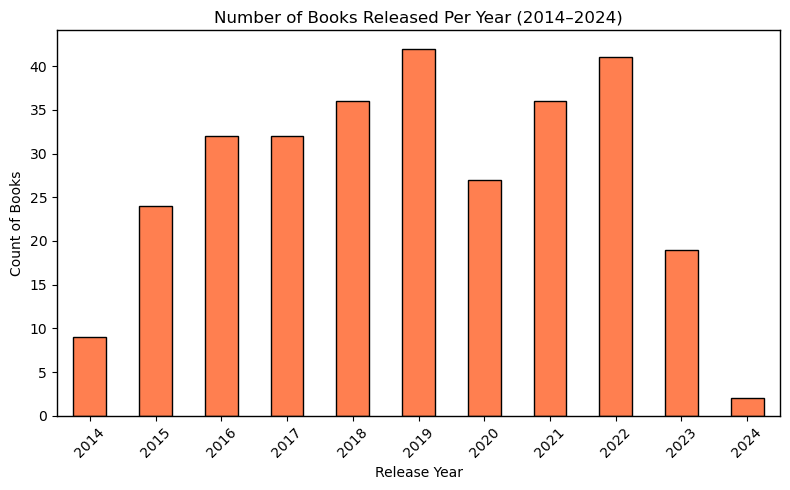

In [ ]:
# Books Per Year
import matplotlib.pyplot as plt

df_books['release_year'] = df_books['release_year'].astype('Int64')

year_counts = df_books['release_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = year_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Books Released Per Year (2014–2024)')
plt.xlabel('Release Year')
plt.ylabel('Count of Books')
plt.xticks(rotation=45)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()


- Book publications increased steadily from the year 2014 and peaked in 2019. This reflects growing interest in publishing or more title acquisition during those years.

- Book publications decreased in 2020, supposedly mirroring the global disruption from the COVID-19 pandemic.

- Book releases bounced back strongly in 2021 and remained high in 2022, indicating that publishers quickly adapted to pandemic-related disruptions.

- There's a drop again in 2023 and a sharp drop in 2024, which may be due to:
  - Missing metadata for newer releases
  - Deferred data entry or indexing for 2024 titles


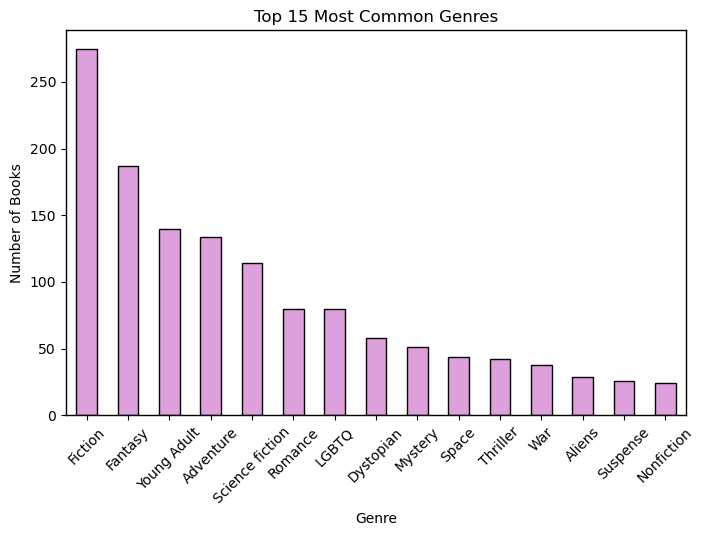

In [ ]:
# Genre Frequency (Top 15)
from collections import Counter
import pandas as pd

genre_counts = Counter([genre for sublist in df_books['genres'] for genre in sublist if isinstance(sublist, list)])
top_genres = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False).head(15)

ax = top_genres.plot(kind='bar', figsize=(8, 5), color='plum', edgecolor='black')
ax.legend().set_visible(False)
plt.title('Top 15 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.show()

- With over 275 books, Fiction is by far the most prevalent genre, underscoring its universal appeal and the broad categorization often used in publishing.

- Fantasy and Young Adult follow closely, reflecting ongoing popularity trends in modern literature, especially among younger and crossover audiences.

- Adventure, Science Fiction, and Romance are also widely represented, suggesting a preference for immersive, emotionally driven, or speculative narratives.

- Genres like LGBTQ, Dystopian, and Mystery show that the dataset covers a wide spectrum of themes, catering to both niche and mainstream interests.


<h4>Step 2: Acquire Book Reviews from Hardcover</h4>

- Step 1.2.1: Retrieve 50 Reviews for One Book
- Step 1.2.2: Retrieve Up to 50 Reviews for top 5 all time trending Books
- Step 1.2.3: Retrieve Up to 500 Reviews for all 300 trending Books

<h4>Step 1.2.1: Retrieve 50 Reviews for One Book</h4>

To test multi-page review scraping, we perform pagination and visit additional review pages for the same book. We parse the pages and collect up to 50 valid reviews. This ensures our logic could scale beyond the first page and handle books with larger volumes of feedback.

In [ ]:
listURL = "https://hardcover.app/books/bride-2024/reviews"
html = requests.get(listURL).text
html

'<!DOCTYPE html>\n<html lang="en" class="h-full antialiased dark">\n  <head>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover">\n    <title inertia>Reviews for Bride</title>\n    <meta name="description" content="Read reviews for Bride on Hardcover" inertia>\n    <link rel="stylesheet" href="https://static.hardcover.app/vite/assets/fonts-DzqwSaWy.css" media="screen" />\n    <link rel="preconnect" href="https://search.hardcover.app" />\n\n      <meta property="og:title" content="Reviews for Bride - Hardcover" inertia="og:title">\n      <meta property="og:description" content="Read reviews for Bride on Hardcover" inertia="og:description">\n      <meta property="og:url" content="https://hardcover.app/books/bride-2024/reviews" inertia="og:url">\n      <meta property="og:site_name" content="Hardcover" inertia>\n          <meta property="og:image" content="" inertia="og:image">\n          <meta property="og:image:width" content="" inertia="og:imag

In [ ]:
soup = BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE html>

<html class="h-full antialiased dark" lang="en">
<head>
<meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/>
<title inertia="">Reviews for Bride</title>
<meta content="Read reviews for Bride on Hardcover" inertia="" name="description"/>
<link href="https://static.hardcover.app/vite/assets/fonts-DzqwSaWy.css" media="screen" rel="stylesheet"/>
<link href="https://search.hardcover.app" rel="preconnect"/>
<meta content="Reviews for Bride - Hardcover" inertia="og:title" property="og:title"/>
<meta content="Read reviews for Bride on Hardcover" inertia="og:description" property="og:description"/>
<meta content="https://hardcover.app/books/bride-2024/reviews" inertia="og:url" property="og:url"/>
<meta content="Hardcover" inertia="" property="og:site_name"/>
<meta content="" inertia="og:image" property="og:image"/>
<meta content="" inertia="og:image:width" property="og:image:width"/>
<meta content="" inertia="og:image:height" property="og:

In [ ]:
data_page_raw = soup.find("div", id="app")["data-page"]
data_page_raw

'{"component":"clientverse/books/reviews/index","props":{"generatedAt":1746746724,"pathName":"/books/bride-2024/reviews","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"Read reviews for Bride on Hardcover","icons":{"icon":"https://assets.hardcover.app/static/favicon.ico","apple":"https://assets.hardcover.app/static/logos/hardcover-logo.jpeg"},"alternates":{"types":{"application/rss+xml":"https://hardcover.app/rss"}},"openGraph":{"type":"website","url":"https://hardcover.app/books/bride-2024/reviews","title":"Reviews for Bride - Hardcover","description":"Read reviews for Bride on Hardcover","siteName":"Hardcover","images":[{}]},"title":"Reviews for Bride"},"rootState":{"currentUser":{"session":{"expiresAt":1746747624,"referrerId":null,"referrerUrl":"https://adamfortuna.com","jwt":"eyJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJIYXJkY292ZXIiLCJ2ZXJzaW9uIjoiOCIsImp0aSI6IjMwMzAwNDhjLTE2ZjAtNDRkMi05YzY2LTEwZTJiNzU4NDAxZiIsImFw

In [ ]:
import html

data_page_json = html.unescape(data_page_raw)
data_page_json

'{"component":"clientverse/books/reviews/index","props":{"generatedAt":1746746724,"pathName":"/books/bride-2024/reviews","metadata":{"titleDefault":"Hardcover - Social discovery for serious book lovers","titleTemplate":" | Hardcover","description":"Read reviews for Bride on Hardcover","icons":{"icon":"https://assets.hardcover.app/static/favicon.ico","apple":"https://assets.hardcover.app/static/logos/hardcover-logo.jpeg"},"alternates":{"types":{"application/rss+xml":"https://hardcover.app/rss"}},"openGraph":{"type":"website","url":"https://hardcover.app/books/bride-2024/reviews","title":"Reviews for Bride - Hardcover","description":"Read reviews for Bride on Hardcover","siteName":"Hardcover","images":[{}]},"title":"Reviews for Bride"},"rootState":{"currentUser":{"session":{"expiresAt":1746747624,"referrerId":null,"referrerUrl":"https://adamfortuna.com","jwt":"eyJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJIYXJkY292ZXIiLCJ2ZXJzaW9uIjoiOCIsImp0aSI6IjMwMzAwNDhjLTE2ZjAtNDRkMi05YzY2LTEwZTJiNzU4NDAxZiIsImFw

In [ ]:
data = json.loads(data_page_json)
data

{'component': 'clientverse/books/reviews/index',
 'props': {'generatedAt': 1746746724,
  'pathName': '/books/bride-2024/reviews',
  'metadata': {'titleDefault': 'Hardcover - Social discovery for serious book lovers',
   'titleTemplate': ' | Hardcover',
   'description': 'Read reviews for Bride on Hardcover',
   'icons': {'icon': 'https://assets.hardcover.app/static/favicon.ico',
    'apple': 'https://assets.hardcover.app/static/logos/hardcover-logo.jpeg'},
   'alternates': {'types': {'application/rss+xml': 'https://hardcover.app/rss'}},
   'openGraph': {'type': 'website',
    'url': 'https://hardcover.app/books/bride-2024/reviews',
    'title': 'Reviews for Bride - Hardcover',
    'description': 'Read reviews for Bride on Hardcover',
    'siteName': 'Hardcover',
    'images': [{}]},
   'title': 'Reviews for Bride'},
  'rootState': {'currentUser': {'session': {'expiresAt': 1746747624,
     'referrerId': None,
     'referrerUrl': 'https://adamfortuna.com',
     'jwt': 'eyJhbGciOiJIUzI1Ni

In [ ]:
genres = ', '.join([g['tag'] for g in data['props']['book']['genres']])

# This is a list:
reviews = data['props']['reviews']

# Loop through the list
for review in reviews:
    print(review['reviewRaw'])

there is no way this is a published abo fanfic
I really wanted this book to live up to the hype, but I honestly struggled to finish the book. I felt there was a lack of character development and description. I think Misery might have had blonde hair? All I remember is that the vamps had purple eyes and blood. I also thought there were some contradictions throughout the book. This supposed rivalry between vamps and weres; the wolves were basically the top of the food chain and the vamps were at the bottom as they had nothing going for them. The vamps were pretty much just weak humans with a taste for blood. So to me it was strange how a big bad wolf was scared of a vamp who could only bare their fangs. It had promise, and hopefully (with how this book ended) if there is a second book the author will do a better job with creating characters.
There was one part that was like right out of Twilight that had me laughing out loud.
I really enjoyed this book! I am such an Ali Hazelwood fan! I 

In [ ]:
review_data = []
for r in reviews:
    review_data.append({
        'bookId': r['bookId'],
        'rating': float(r['rating']),
        'review': r['reviewRaw'].strip(),
        'genre': genres
    })

# Create a DataFrame
df_reviews = pd.DataFrame(review_data)
df_reviews

bookId  rating                                             review  \
0   801806     3.0     there is no way this is a published abo fanfic   
1   801806     3.0  I really wanted this book to live up to the hy...   
2   801806     4.0  There was one part that was like right out of ...   
3   801806     5.0  I really enjoyed this book! I am such an Ali H...   
4   801806     2.0  Mmmm.It’s… can I say unseasoned and poorly exe...   
5   801806     5.0  I've read several of Hazelwoods contemporary b...   
6   801806     3.0                                           🧛🏻‍♀️♥️🐺   
7   801806     3.0                                       FOMO made me   
8   801806     5.0  Misery has found herself in an exchange where ...   
9   801806     4.0  First half of this book was a five-star read. ...   
10  801806     4.0                                               4/5⭐   
11  801806     4.0  it’s a 4 stars for me, is my first time readin...   
12  801806     3.5                                       tat my thing   
13  801806     5.0  So different from the other books from the sam...   
14  801806     2.0               What in the wattpad did I just read?   
15  801806     4.0  3.75/4 ⭐️Overall, the book was great—maybe a b...   
16  801806     4.0  I would have given this 5 stars if it would ha...   
17  801806     3.0  ????https://www.frowl.org/worstbestsellers/epi...   
18  801806     4.0  Reseña flash:Desde un inicio supe que este lib...   
19  801806     5.0  Normally, I can storm right through Hazelwood'...   
20  801806     4.5  💬: "“I would take anything she chose to give m...   
21  801806     1.0  The end ruined my entire experience with this ...   
22  801806     5.0  I read this just for a silly read, but ended u...   
23  801806     5.0           PF PF PJALA PONER DE PUNTUACIÓN INFINITA   
24  801806     3.0                 Siento que le fallé a mi madre Ali   

                                     genre  
0   Fantasy, Fiction, Romance, Young Adult  
1   Fantasy, Fiction, Romance, Young Adult  
2   Fantasy, Fiction, Romance, Young Adult  
3   Fantasy, Fiction, Romance, Young Adult  
4   Fantasy, Fiction, Romance, Young Adult  
5   Fantasy, Fiction, Romance, Young Adult  
6   Fantasy, Fiction, Romance, Young Adult  
7   Fantasy, Fiction, Romance, Young Adult  
8   Fantasy, Fiction, Romance, Young Adult  
9   Fantasy, Fiction, Romance, Young Adult  
10  Fantasy, Fiction, Romance, Young Adult  
11  Fantasy, Fiction, Romance, Young Adult  
12  Fantasy, Fiction, Romance, Young Adult  
13  Fantasy, Fiction, Romance, Young Adult  
14  Fantasy, Fiction, Romance, Young Adult  
15  Fantasy, Fiction, Romance, Young Adult  
16  Fantasy, Fiction, Romance, Young Adult  
17  Fantasy, Fiction, Romance, Young Adult  
18  Fantasy, Fiction, Romance, Young Adult  
19  Fantasy, Fiction, Romance, Young Adult  
20  Fantasy, Fiction, Romance, Young Adult  
21  Fantasy, Fiction, Romance, Young Adult  
22  Fantasy, Fiction, Romance, Young Adult  
23  Fantasy, Fiction, Romance, Young Adult  
24  Fantasy, Fiction, Romance, Young Adult

In [ ]:
all_reviews = []

# Only scrape first 2 pages
for page_num in [1, 2]:
    print(f"Scraping page {page_num}...")
    url = f"https://hardcover.app/books/bride-2024/reviews?page={page_num}"
    response = requests.get(url)

    soup = BeautifulSoup(response.text, "html.parser")
    data_page_json = html.unescape(soup.find("div", id="app")["data-page"])
    data = json.loads(data_page_json)

    genres = ', '.join([g['tag'] for g in data['props']['book']['genres']])
    reviews = data['props']['reviews']

    for r in reviews:
        all_reviews.append({
            'bookId': r['bookId'],
            'rating': float(r['rating']),
            'review': r['reviewRaw'].strip(),
            'genre':genres
        })

# Limit to exactly 50 records (if more)
df_reviews = pd.DataFrame(all_reviews[:50])

Scraping page 1...
Scraping page 2...


In [ ]:
df_reviews

bookId  rating                                             review  \
0   801806     3.0     there is no way this is a published abo fanfic   
1   801806     3.0  I really wanted this book to live up to the hy...   
2   801806     4.0  There was one part that was like right out of ...   
3   801806     5.0  I really enjoyed this book! I am such an Ali H...   
4   801806     2.0  Mmmm.It’s… can I say unseasoned and poorly exe...   
5   801806     5.0  I've read several of Hazelwoods contemporary b...   
6   801806     3.0                                           🧛🏻‍♀️♥️🐺   
7   801806     3.0                                       FOMO made me   
8   801806     5.0  Misery has found herself in an exchange where ...   
9   801806     4.0  First half of this book was a five-star read. ...   
10  801806     4.0                                               4/5⭐   
11  801806     4.0  it’s a 4 stars for me, is my first time readin...   
12  801806     3.5                                       tat my thing   
13  801806     5.0  So different from the other books from the sam...   
14  801806     2.0               What in the wattpad did I just read?   
15  801806     4.0  3.75/4 ⭐️Overall, the book was great—maybe a b...   
16  801806     4.0  I would have given this 5 stars if it would ha...   
17  801806     3.0  ????https://www.frowl.org/worstbestsellers/epi...   
18  801806     4.0  Reseña flash:Desde un inicio supe que este lib...   
19  801806     5.0  Normally, I can storm right through Hazelwood'...   
20  801806     4.5  💬: "“I would take anything she chose to give m...   
21  801806     1.0  The end ruined my entire experience with this ...   
22  801806     5.0  I read this just for a silly read, but ended u...   
23  801806     5.0           PF PF PJALA PONER DE PUNTUACIÓN INFINITA   
24  801806     3.0                 Siento que le fallé a mi madre Ali   
25  801806     1.0  If you’re looking for an insufferable protagon...   
26  801806     4.0  As a diehard werewolf fanfic girl this book at...   
27  801806     4.0  this had no business being this fun also a bum...   
28  801806     4.0  First Ali Hazelwood is locked IN.I'll admit I'...   
29  801806     4.0  This took me back to my Wattpad days! I don't ...   
30  801806     2.0  sex scenes were cringe but the romance was... ...   
31  801806     5.0  This was absolutely a 5 star for me The vibes ...   
32  801806     3.0        This is the weirdest book I have ever read.   
33  801806     5.0  This was my first Ali Hazelwood book and I dev...   
34  801806     3.0  My first TikTok-sensation, Wattpad-type book. ...   
35  801806     4.0  4.5 estrellasCómo a alguien no le puede gustar...   
36  801806     5.0  I LOVED this book.It was a quick read, but so ...   
37  801806     3.0  After hearing WithCindy and The Book Leo's rat...   
38  801806     3.0  The book was mostly enjoyable, I laughed a few...   
39  801806     4.0  had me from the first fangs-to-neck contact......   
40  801806     4.0  A little cringey, but felt self-aware and full...   
41  801806     4.0  Cute supernatural romance. One of my favorite ...   
42  801806     4.0                          This was incredibly wild.   
43  801806     4.0  Fun story. World building was kinda sparse, bu...   
44  801806     5.0  It was nostalgic to all the werewolves books I...   
45  801806     2.0                              Hate read with bestie   
46  801806     3.0  3.5 stars! Might raise it to 4 but for a first...   
47  801806     1.0  TLDR: Book lacked real fantasy elements and th...   
48  801806     3.0  It paid to have read all the omegaverse manhwa...   
49  801806     2.0  POR QUÉ? Iba fenomenal pero esa parte respecto...   

                                     genre  
0   Fantasy, Fiction, Romance, Young Adult  
1   Fantasy, Fiction, Romance, Young Adult  
2   Fantasy, Fiction, Romance, Young Adult  
3   Fantasy, Fiction, Romance, Young Adult  
4   Fantasy, Fiction, Romance, Young Adult  
5   Fantas

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bookId  50 non-null     int64  
 1   rating  50 non-null     float64
 2   review  50 non-null     object 
 3   genre   50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
df_reviews['bookId'].value_counts()

bookId
801806    50
Name: count, dtype: int64

<h4>Step 1.2.2: Retrieve Up to 50 Reviews for top 5 all time trending Books</h4>

Next, we expanded the review scraping logic to collect up to 50 reviews per book for the top 5 trending titles. This tested our pagination approach on multiple items and ensured that performance remained stable when scaled to multiple targets.

In [ ]:
# Assumes df_books already exists
review_data = []

# Process only the first 5 books
for idx, row in df_books.iloc[:5].iterrows():
    book_id = row['bookId']
    book_url = row['url']

    total_collected = 0
    page_num = 1

    while total_collected < 50:
        review_url = f"{book_url}/reviews?page={page_num}"

        try:
            response = requests.get(review_url)
            soup = BeautifulSoup(response.text, "html.parser")
            data_page_raw = soup.find("div", id="app")["data-page"]
            data_page_json = html.unescape(data_page_raw)
            data = json.loads(data_page_json)
            genres = ', '.join([g['tag'] for g in data['props']['book']['genres']])
            reviews = data['props']['reviews']

            if not reviews:
                break  # No more reviews

            for r in reviews:
                if total_collected >= 50:
                    break
                rating = r.get('rating')
                if rating is None:
                    continue  # Skip reviews with no rating
                review_data.append({
                    'bookId': book_id,
                    'rating': float(rating),
                    'review': r['reviewRaw'].strip(),
                    'genre':genres
                })
                total_collected += 1

            page_num += 1

        except Exception as e:
            print(f"Skipping page {page_num} of {book_url} — error: {e}")
            break

    print(f"✓ Collected {total_collected} reviews from {book_url}")

# Convert to DataFrame
df_reviews = pd.DataFrame(review_data)
print(f"\nTotal reviews collected: {len(df_reviews)}")

✓ Collected 50 reviews from https://hardcover.app/books/project-hail-mary
✓ Collected 50 reviews from https://hardcover.app/books/all-systems-red
✓ Collected 50 reviews from https://hardcover.app/books/a-court-of-thorns-and-roses
✓ Collected 50 reviews from https://hardcover.app/books/fourth-wing
✓ Collected 50 reviews from https://hardcover.app/books/the-seven-husbands-of-evelyn-hugo

Total reviews collected: 250


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bookId  250 non-null    int64  
 1   rating  250 non-null    float64
 2   review  250 non-null    object 
 3   genre   250 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [ ]:
df_reviews.isna().sum()

bookId    0
rating    0
review    0
genre     0
dtype: int64

In [ ]:
df_reviews['bookId'].value_counts()

bookId
427578    50
427971    50
428290    50
714600    50
340654    50
Name: count, dtype: int64

<h4>Step 1.2.3: Retrieve Up to 500 Reviews for all 300 trending Books</h4>

Finally, we applied the full review scraping pipeline to the entire set of 300 books gathered in Step 1.3. For each book, we looped through review pages until either 500 reviews were collected or no more were available. This resulted in a review dataset that can now be merged with df_books to support user sentiment analysis, review quality scoring, and genre-based feedback comparison.

In [ ]:
# df_books exists with 'bookId' and 'url'
review_data = []

for idx, row in df_books.iterrows():
    book_id = row['bookId']
    book_url = row['url']

    total_collected = 0
    page_num = 1

    while total_collected < 500:
        review_url = f"{book_url}/reviews?page={page_num}"

        try:
            response = requests.get(review_url)
            soup = BeautifulSoup(response.text, "html.parser")
            data_page_raw = soup.find("div", id="app")["data-page"]
            data_page_json = html.unescape(data_page_raw)
            data = json.loads(data_page_json)
            genres = ', '.join([g['tag'] for g in data['props']['book']['genres']])
            reviews = data['props']['reviews']

            if not reviews:
                break  # No more reviews, stop pagination

            for r in reviews:
                if total_collected >= 501:
                    break  # Don't collect more than 500
                rating = r.get('rating')
                if rating is None:
                    continue
                review_data.append({
                    'bookId': book_id,
                    'rating': float(rating),
                    'review': r['reviewRaw'].strip(),
                    'genre':genres
                })
                total_collected += 1

            page_num += 1  # Go to next review page

        except Exception as e:
            print(f"Error scraping {review_url}: {e}")
            break

    print(f"✓ Collected {total_collected} reviews from {book_url}")

# Create DataFrame
df_reviews = pd.DataFrame(review_data)
print(f"\nTotal reviews collected: {len(df_reviews)}")

✓ Collected 291 reviews from https://hardcover.app/books/project-hail-mary
✓ Collected 215 reviews from https://hardcover.app/books/all-systems-red
✓ Collected 242 reviews from https://hardcover.app/books/a-court-of-thorns-and-roses
✓ Collected 300 reviews from https://hardcover.app/books/fourth-wing
✓ Collected 264 reviews from https://hardcover.app/books/the-seven-husbands-of-evelyn-hugo
✓ Collected 208 reviews from https://hardcover.app/books/circe
✓ Collected 193 reviews from https://hardcover.app/books/tomorrow-and-tomorrow-and-tomorrow
✓ Collected 170 reviews from https://hardcover.app/books/a-court-of-mist-and-fury
✓ Collected 177 reviews from https://hardcover.app/books/im-glad-my-mom-died
✓ Collected 186 reviews from https://hardcover.app/books/dark-matter
✓ Collected 162 reviews from https://hardcover.app/books/piranesi
✓ Collected 199 reviews from https://hardcover.app/books/the-invisible-life-of-addie-larue
✓ Collected 173 reviews from https://hardcover.app/books/legends-la

Total of 21,515 reviews are collected for the 300 books.

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21515 entries, 0 to 21514
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bookId  21515 non-null  int64  
 1   rating  21515 non-null  float64
 2   review  21515 non-null  object 
 3   genre   21515 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 672.5+ KB


In [ ]:
df_reviews.isna().sum()

bookId    0
rating    0
review    0
genre     0
dtype: int64

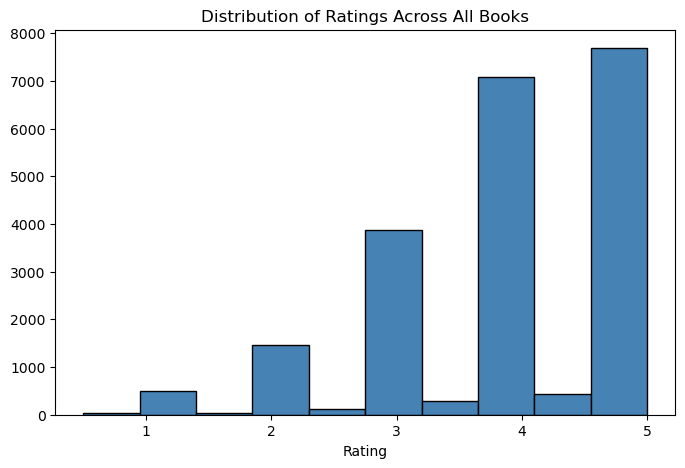

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
df_reviews['rating'].hist(bins=10, edgecolor='black', color='steelblue')
plt.title('Distribution of Ratings Across All Books')
plt.xlabel('Rating')
plt.grid(False)
plt.show()

- The heavy skew towards 4- and 5-star ratings, and the most common rating is 5 stars, which suggests aggregate reader willingness to leave a review once they have had a positive experience.

- Hardcover possesses such a significantly higher volume of unique ratings that indicate a more engaged and active user set.

- 1 and 2 star ratings are relatively rare. This could be either due to selection bias (users only rating books they enjoyed) or a generally more positive community culture where criticism is less common.

- 3 star ratings are still well represented, showing that readers also provide neutral or mixed reviews — not only extremes.


In [ ]:
book_avg_ratings = df_reviews.groupby('bookId')['rating'].mean().round(2)
top_10_ids = book_avg_ratings.sort_values(ascending=False).head(10).index
top_10_books = df_books[df_books['bookId'].isin(top_10_ids)][['bookId', 'title']].drop_duplicates()
top_10_books = top_10_books.merge(book_avg_ratings.rename('average_rating'), on='bookId')
top_10_books = top_10_books.sort_values(by='average_rating', ascending=False)

print("Top 10 Books by Average Rating:")
top_10_books[['bookId','title', 'average_rating']]

Top 10 Books by Average Rating:


bookId                                              title  average_rating
6  383308                           Between the World and Me            4.73
8  430977                                     Tiamat's Wrath            4.66
9  594985                               The Will of the Many            4.66
3  375699  Born A Crime: Stories from a South African Chi...            4.62
4  386091                                    The Hate U Give            4.61
0  427456                                       Morning Star            4.59
2  153090                                   Queen of Shadows            4.59
7  429018                                     Kingdom of Ash            4.57
5  436539                         Heartstopper: Volume Three            4.55
1  467728                           Heartstopper: Volume Two            4.54

In [ ]:
# Save the DataFrame to CSV
df_reviews.to_csv("hardcover_data.csv", index=False)

<h3> Part 2: Data acquition using Google Books</h3>

<h4>Step 1: Data acquisition using the ISBN-13 from the Hardcover Metadata</h4>

- Step 2.1.1 Extracting Metadata for 1 Book
- Step 2.1.2 Extracting Metadata for 50 Books
- Step 2.1.3 Extracting Metadata for 300 Books


<h4>Step 2.1.1 Extracting Metadata for 1 Book</h4>
To retrieve metadata from Google Books, we leveraged the ISBN-13 numbers available for each book in our dataset.

In [ ]:
# Select the first book from df_books
first_book = df_books.iloc[0]

# Step 1: Choose a single ISBN from the book
isbn_list = first_book.get("isbn_13_list", [])
sample_isbn = isbn_list[4] if len(isbn_list) > 4 else isbn_list[0]

print(f"Querying Google Books API for ISBN: {sample_isbn}")

# Step 2: Define API endpoint and parameters
api_url = "https://www.googleapis.com/books/v1/volumes"
params = {"q": f"isbn:{sample_isbn}"}

# Step 3: Make the request
response = requests.get(api_url, params=params)

# Step 4: Parse and return structured result
if response.status_code == 200:
    results = response.json()
    items = results.get("items", [])

    if not items:
        print("No results found.")
    else:
        best_match = items[0]['volumeInfo']
        title = best_match.get('title')
        authors = ', '.join(best_match.get('authors', []))
        pub_date = best_match.get('publishedDate')
        rating = best_match.get('averageRating')
        rating_count = best_match.get('ratingsCount', 0)
        info_link = best_match.get('infoLink')

        print(f"\n Top Match:\n")
        print(f"Title: {title}")
        print(f" Author(s): {authors}")
        print(f"Published: {pub_date}")
        print(f"Rating: {rating} ({rating_count} ratings)")
        print(f" Info Link: {info_link}")
else:
    print(f" API request failed with status code {response.status_code}")


Querying Google Books API for ISBN: 9788925588735

 Top Match:

Title: Project Hail Mary
✍ Author(s): Weir Andy
Published: 2021-05-04
Rating: None (0 ratings)
 Info Link: http://books.google.com/books?id=22WazgEACAAJ&dq=isbn:9788925588735&hl=&source=gbs_api


<h4>Step 2.1.2 Extracting Metadata for 50 Books</h4>

Since many books have multiple associated ISBNs (e.g., different editions, formats, or reprints), we implemented a loop to iterate through the full list of ISBNs for each title until we found a version with a valid rating.


In [ ]:
def get_book_info_with_rating(isbn_list):
    for isbn in isbn_list:
        url = "https://www.googleapis.com/books/v1/volumes"
        params = {"q": f"isbn:{isbn}"}

        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                items = data.get("items", [])
                if items:
                    info = items[0].get("volumeInfo", {})
                    if info.get("averageRating") is not None:  # Only accept if rating exists
                        return {
                            "title": info.get("title"),
                            "authors": ', '.join(info.get("authors", [])) if info.get("authors") else None,
                            "published_date": info.get("publishedDate"),
                            "average_rating": info.get("averageRating"),
                            "ratings_count": info.get("ratingsCount"),
                            "categories": ', '.join(info.get("categories", [])) if "categories" in info else None,
                            "info_link": info.get("infoLink"),
                            "isbn_used": isbn
                        }
        except Exception as e:
            print(f" Error fetching ISBN {isbn}: {e}")

    return None  # If none of the ISBNs return a rated book


In [ ]:
results = []

for idx, row in df_books.iloc[:50].iterrows():
    isbn_list = row.get("isbn_13_list", [])
    book_data = get_book_info_with_rating(isbn_list)

    if book_data:
        book_data.update({
            "original_title": row.get("title"),
            "original_author": row.get("author")
        })
        results.append(book_data)

    time.sleep(0.5)

df_50_rated = pd.DataFrame(results)
display(df_50_rated)


title              authors  \
0                                   Project Hail Mary            Andy Weir   
1                                     All Systems Red         Martha Wells   
2                  Corte de espinhos e rosas (Vol. 1)        Sarah J. Maas   
3                                         Fourth Wing       Rebecca Yarros   
4                   The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
5                                               Circe      Madeline Miller   
6                Tomorrow, and Tomorrow, and Tomorrow      Gabrielle Zevin   
7                            A Court of Mist and Fury        Sarah J. Maas   
8                                I'm Glad My Mom Died     Jennette McCurdy   
9                                         Dark Matter         Blake Crouch   
10                  The Invisible Life of Addie LaRue         V. E. Schwab   
11                                   Legends & Lattes       Travis Baldree   
12                                 The Silent Patient     Alex Michaelides   
13                                        Oathbringer    Brandon Sanderson   
14                                     Rogue Protocol         Martha Wells   
15                                         Yellowface      Rebecca F Kuang   
16                                           Educated        Tara Westover   
17                              Vier Farben der Magie         V. E. Schwab   
18         Where the Crawdads Sing: Reese's Book Club          Delia Owens   
19                The Subtle Art of Not Giving a F*ck          Mark Manson   
20                                         Golden Son         Pierce Brown   
21                     A Court of Frost and Starlight        Sarah J. Maas   
22                                      The Poppy War          R. F. Kuang   
23                                        Book Lovers          Emily Henry   
24                                            Artemis            Andy Weir   
25                            Daisy Jones and The Six  Taylor Jenkins Reid   
26       El largo viaje a un pequeño planeta iracundo       Becky Chambers   
27                         A Psalm for the Wild-Built       Becky Chambers   
28                      A Court of Thorns and Roses 4        Sarah J. Maas   
29                                  El príncipe cruel          Holly Black   
30                                  Reino de Ladrones        Leigh Bardugo   
31                                      Rhythm of War    Brandon Sanderson   
32                      A Good Girl's Guide to Murder        Holly Jackson   
33                                             Verity       Colleen Hoover   
34  Hunger Games Trilogy: The Ballad of Songbirds ...      Suzanne Collins   
35                                       Morning Star         Pierce Brown   
36                                   Gideon the Ninth          Tamsyn Muir   
37                                       Heartstopper         Alice Oseman   
38                                The Love Hypothesis        Ali Hazelwood   
39                                   Children of Time   Adrian Tchaikovsky   
40                                    Das neunte Haus        Leigh Bardugo   
41                                    Shadows of Self    Brandon Sanderson   
42                           The Thursday Murder Club        Richard Osman   

   published_date  average_rating  ratings_count                 categories  \
0      2021-05-04             5.0              2                    Fiction   
1      2017-05-02             4.5              4                    Fiction   
2      2015-12-11             4.5              5                    Fiction   
3      2023-05-02             5.0              2                    Fiction   
4      2017-06-13             5.0              2                    Fiction   
5      2018-04-10             4.5              4                    Fiction   
6      2022-07-05             5.0              1              

<h4>Step 2.1.3 Extracting Metadata for 300 Books</h4>

In [ ]:
results = []

for idx, row in df_books.iloc[:300].iterrows():
    isbn_list = row.get("isbn_13_list", [])
    book_data = get_book_info_with_rating(isbn_list)

    if book_data:
        book_data.update({
            "original_title": row.get("title"),
            "original_author": row.get("author")
        })
        results.append(book_data)

    time.sleep(0.5)

google_books_df = pd.DataFrame(results)
display(google_books_df)

title              authors published_date  \
0                      Project Hail Mary            Andy Weir     2021-05-04   
1     Corte de espinhos e rosas (Vol. 1)        Sarah J. Maas     2015-12-11   
2                            Fourth Wing       Rebecca Yarros     2023-05-02   
3      The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid     2017-06-13   
4                                  Circe      Madeline Miller     2018-04-10   
..                                   ...                  ...            ...   
138  Less (Winner of the Pulitzer Prize)    Andrew Sean Greer     2017-07-18   
139                  The Family Upstairs          Lisa Jewell     2019-08-08   
140                A Flicker in the Dark     Stacy Willingham     2022-01-11   
141                            Elon Musk         Ashlee Vance     2016-04-05   
142              How to Be an Antiracist       Ibram X. Kendi     2019-08-13   

     average_rating  ratings_count                 categories  \
0               5.0              2                    Fiction   
1               4.5              5                    Fiction   
2               5.0              2                    Fiction   
3               5.0              2                    Fiction   
4               4.5              4                    Fiction   
..              ...            ...                        ...   
138             4.0              2                    Fiction   
139             5.0              2                    Fiction   
140             5.0              1                    Fiction   
141             3.5              3  Biography & Autobiography   
142             5.0              1          Political Science   

                                             info_link      isbn_used  \
0    https://play.google.com/store/books/details?id...  9780593135211   
1    http://books.google.com/books?id=Mg8xCwAAQBAJ&...  9788501107114   
2    https://play.google.com/store/books/details?id...  9781649374080   
3    https://play.google.com/store/books/details?id...  9781501139246   
4    https://play.google.com/store/books/details?id...  9780316556330   
..                                                 ...            ...   
138  https://play.google.com/store/books/details?id...  9780316316149   
139  http://books.google.com/books?id=s_10DwAAQBAJ&...  9781473561342   
140  http://books.google.com/books?id=QtEuEAAAQBAJ&...  9781250803825   
141  http://books.google.com/books?id=XWicjgEACAAJ&...  9780062469670   
142  https://play.google.com/store/books/details?id...  9780525509295   

                                        original_title      original_author  
0                                    Project Hail Mary            Andy Weir  
1                          A Court of Thorns and Roses        Sarah J. Maas  
2                                          Fourth Wing       Rebecca Yarros  
3                    The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid  
4                                                Circe      Madeline Miller  
..                                                 ...                  ...  
138                                               Less    Andrew Sean Greer  
139                                The Family Upstairs          Lisa Jewell  
140                              A Flicker in the Dark     Stacy Willingham  
141  Elon Musk: Tesla, SpaceX, and the Quest for a ...         Ashlee Vance  
142                            How to Be an Antiracist      Ibram X. Kendi   

[143 rows x 10 columns]

This strategy significantly improved data quality compared to using only the first available ISBN. However, we continued to encounter challenges:
- For many books, none of the provided ISBNs returned a Google Books entry with a rating.
- Even when metadata was returned, a large number of entries lacked user ratings entirely (`null` values for averageRating and ratingsCount).

In [ ]:
# Save the DataFrame to CSV
google_books_df.to_csv("google_books_data.csv", index=False)

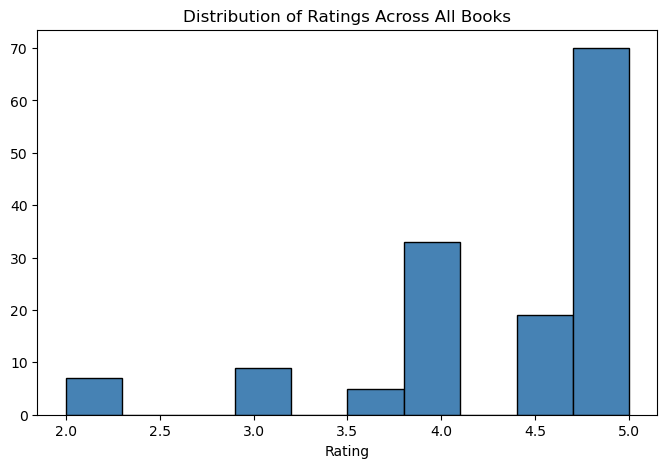

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
google_books_df['average_rating'].hist(bins=10, edgecolor='black', color='steelblue')
plt.title('Distribution of Ratings Across All Books')
plt.xlabel('Rating')
plt.grid(False)
plt.show()

- The majority of the ratings are 5-star, indicating that users post predominantly very positive feedback.

- The ratings are highly skewed to the higher end (4.0–5.0), which suggests a positivity bias in user reviews.

-  Less than 3-star ratings are sparse, which can either reflect actual satisfaction or people not leaving reviews for books they did not like.

<h2>Platform Comparison</h2>

1. **Coverage and Match Rate**: We attempted to extract metadata for 300 books using ISBNs. While Hardcover provided ratings for all 300, Google Books returned data for only 143 books, reflecting limited coverage and weaker metadata availability for newer or niche titles.

2. **Volume of Reviews**: Hardcover featured a significantly higher number of user ratings per book, often in the thousands. In contrast, Google Books showed minimal user engagement, with many matched books having only a handful of ratings — or none at all.

3. **Rating Distribution Patterns**: Ratings on Hardcover showed a broader distribution, with meaningful representation across 3-, 4-, and 5-star ratings. On Google Books, ratings were heavily skewed toward higher scores, partly due to filtering for ISBNs that had non-null ratings, introducing selection bias.

4. **User Behavior and Engagement**: Hardcover appears to attract a more engaged and expressive reader base, likely due to its design focus on reading communities. Google Books, on the other hand, functions more as a metadata catalog with limited user interaction.

5. **Data Reliability and Utility**: For analytical purposes, Hardcover proved to be the more reliable and complete platform — both in terms of review quantity and quality. Google Books may still be useful for basic metadata (e.g., publication date, categories), but not for in-depth sentiment or rating-based analysis.
